# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import random

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

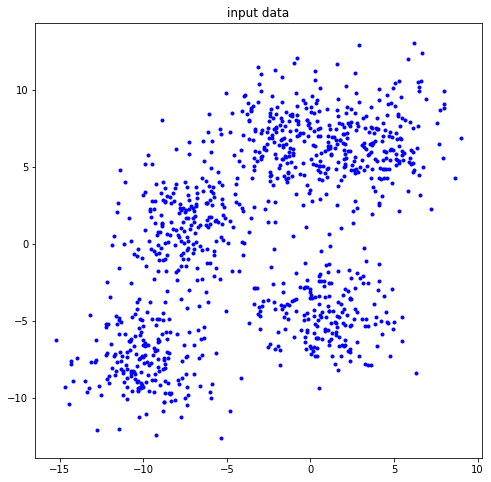

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.plot(x, y, '.', color = 'blue')

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
a = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
b = np.array([[1,1]])
print(a.shape, b.shape)
print(((a-b)**2))
print(np.sqrt(((a-b)**2).sum(axis=1)))

(5, 2) (1, 2)
[[ 0  0]
 [ 1  1]
 [ 4  4]
 [ 9  9]
 [16 16]]
[0.         1.41421356 2.82842712 4.24264069 5.65685425]


In [5]:
def compute_distance(feature, center):
    
    square_abs = (feature-center)**2
    value = square_abs.sum(axis=1)
    distance = np.sqrt(value)
    
    return distance

print(compute_distance(a,b))

[0.         1.41421356 2.82842712 4.24264069 5.65685425]


## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [6]:
print(feature.shape[0])
a = np.zeros(feature[0].shape)
print(feature[0])
print(a+feature[0]+feature[0])

1000
[-2.78158782  6.13851704]
[-5.56317564 12.27703408]


In [7]:
def compute_centroid(feature, label_feature, value_label):
    
    add = np.zeros(feature[0].shape);
    num = 0
    
    for i in range(feature.shape[0]):
        if(label_feature[i] == value_label):
            add = add + feature[i]
            num = num + 1
    
    centroid = (1/num)*add
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [86]:
a = np.array([[1,2],[2,4],[3,2],[5,2],[7,10],[1,12],[10,2]])
print(a.argmax(axis=1))
print(a.sum())

[1 1 0 0 1 1 0]
63


In [9]:
def compute_label(distance):
    
    label_feature = distance.argmin(axis=1)
    
    return label_feature


In [151]:
# assign the number of clusters and iterations
k = 10
max_iter = 100

number_cluster      = k
number_iteration    = max_iter
# ===================================================
print(number_data, number_cluster, number_feature, number_iteration)

1000 10 2 100


[[ 6.77848211e-01  4.12827833e+00]
 [ 4.16983374e+00  4.94125284e+00]
 [-1.10052464e+01 -7.06722163e+00]
 [-7.47114301e+00 -1.44173822e+00]
 [-2.91612209e+00  7.38393679e+00]
 [ 2.23125524e+00  7.82739616e+00]
 [-1.21223662e+01 -5.24236612e+00]
 [ 3.70875060e+00  7.53615385e+00]
 [-8.68414840e+00  1.20882419e-02]
 [ 6.27923176e-01  5.90517474e+00]]
(1000, 10)
(1000,)


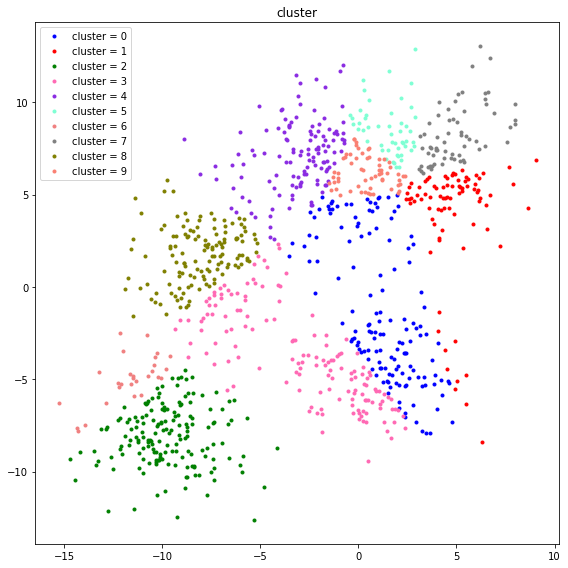

100.5974771442239


In [152]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for k in range(number_cluster):
    random_index = random.randrange(0,number_data)
    centroid[k] = feature[random_index]
    distance[:, k] = compute_distance(feature, centroid[k])
    
label_feature = compute_label(distance)

print(centroid)
print(distance.shape)
print(label_feature.shape)

# initialize centroid and label_feature
# ==========================================================
plot_cluster(feature, label_feature, 10)
print((1/1000)*distance.sum())

In [153]:
for i in range(number_iteration):
    
    for k in range(number_cluster):
        centroid[k,:] = compute_centroid(feature, label_feature, k)  #update k_th centroid
        distance[:, k] = compute_distance(feature, centroid[k,:])   #compute distance from k_th centroid
    
    label_feature = compute_label(distance)   #update label(argmin distance)
    loss = (1/number_data)*(distance.sum())
    loss_iteration[i] = loss
    centroid_iteration[i] = centroid
    print("[%4d] loss = %5.5f" % (i, loss))
    print(centroid)
    

[   0] loss = 101.47985
[[  1.16961433  -1.36873712]
 [  4.79846525   3.80880573]
 [ -9.70344471  -8.0995955 ]
 [ -2.86001084  -3.77014035]
 [ -3.13667514   7.11173489]
 [  1.53111289   8.51340878]
 [-11.69571846  -5.00256609]
 [  4.95323866   8.26899096]
 [ -8.13658724   1.74034524]
 [  0.41205501   6.22092535]]
[   1] loss = 102.23016
[[  1.97807624  -3.87803459]
 [  4.60921915   4.60409055]
 [ -9.57373514  -8.40858623]
 [ -1.76605249  -4.82419468]
 [ -3.11136472   6.95035315]
 [  1.19433817   8.85412328]
 [-10.96541111  -5.21882793]
 [  5.10956485   8.04719296]
 [ -7.62966244   1.45352521]
 [  0.38930748   5.58459145]]
[   2] loss = 102.33874
[[  2.04031913  -4.36462034]
 [  4.46483515   4.77836282]
 [ -9.50675385  -8.55935283]
 [ -1.60615781  -4.84051636]
 [ -3.21817731   7.07469494]
 [  0.84568815   8.77468958]
 [-10.69765613  -5.38775087]
 [  5.24716542   8.33742496]
 [ -7.47989889   1.31121501]
 [  0.2740244    5.20651429]]
[   3] loss = 102.44366
[[  2.18539995  -4.54281923]
 [

[  36] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  37] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  38] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  39] loss = 101.77361
[[  2.3634628   -5.22497622]
 [

[  63] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  64] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  65] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  66] loss = 101.77361
[[  2.3634628   -5.22497622]
 [

[  96] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  97] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  98] loss = 101.77361
[[  2.3634628   -5.22497622]
 [  4.17685695   4.98451811]
 [ -9.62341703  -8.94214324]
 [ -0.90164212  -3.89166624]
 [ -3.4565856    7.2907829 ]
 [  0.67620818   7.87210971]
 [-10.18163616  -5.62792531]
 [  5.15525916   8.68221379]
 [ -7.52577064   1.23549631]
 [ -0.76912705   4.16891858]]
[  99] loss = 101.77361
[[  2.3634628   -5.22497622]
 [

In [240]:
def find_centroid(num, max_iter):
    number_cluster      = num
    number_iteration    = max_iter
    distance            = np.zeros(shape=(number_data, number_cluster))
    centroid            = np.zeros(shape=(number_cluster, number_feature))
    loss_iteration      = np.zeros(shape=(number_iteration, 1))
    centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

    for k in range(number_cluster):
        random_index = random.randrange(0,number_data)
        centroid[k] = feature[random_index]
        distance[:, k] = compute_distance(feature, centroid[k])

    label_feature = compute_label(distance)
    plot_cluster(feature, label_feature, num)
    print((1/number_data)*(distance.sum()))
    
    for i in range(number_iteration):
        loss = (1/number_data)*(distance.sum())
        loss_iteration[i] = loss
        centroid_iteration[i] = centroid
        print("[%4d] loss = %5.5f" % (i, loss))
        print(centroid)
        
        for k in range(number_cluster):
            centroid[k,:] = compute_centroid(feature, label_feature, k)  #update k_th centroid
            distance[:, k] = compute_distance(feature, centroid[k,:])   #compute distance from k_th centroid

        label_feature = compute_label(distance)   #update label(argmin distance)
        
    return centroid, loss_iteration, centroid_iteration, label_feature

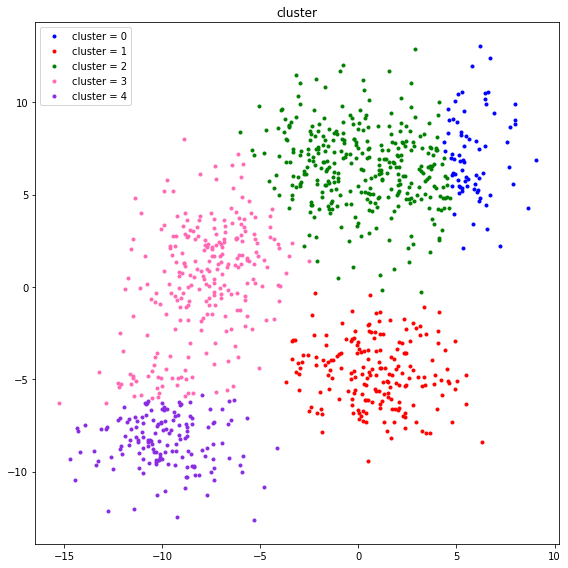

52.500690239301534
[   0] loss = 52.50069
[[ 5.90603005  5.30802002]
 [ 0.20454457 -5.81104825]
 [ 3.40313355  5.03606109]
 [-8.00684572 -2.35030994]
 [-7.40115975 -9.33807479]]
[   1] loss = 51.82944
[[ 5.86424198  7.12606311]
 [ 0.86489406 -4.65677261]
 [ 0.19947905  6.46092885]
 [-7.89546809  0.22905327]
 [-9.84275986 -8.37565481]]
[   2] loss = 50.44386
[[ 4.97723534  6.75422595]
 [ 0.86979545 -4.55878212]
 [-0.62476248  6.59054274]
 [-7.48136049  1.14459597]
 [-9.94023407 -7.72476563]]
[   3] loss = 49.98415
[[ 4.53852358  6.61019736]
 [ 0.87451416 -4.53078124]
 [-1.0022796   6.72205203]
 [-7.40223412  1.35091756]
 [-9.88083045 -7.56471296]]
[   4] loss = 49.78448
[[ 4.28101567  6.56701755]
 [ 0.86873053 -4.5026988 ]
 [-1.24600451  6.81292805]
 [-7.36907072  1.39978843]
 [-9.86675897 -7.52143374]]
[   5] loss = 49.69808
[[ 4.13968523  6.54719429]
 [ 0.86873053 -4.5026988 ]
 [-1.42311123  6.82923276]
 [-7.38835355  1.35976757]
 [-9.86675897 -7.52143374]]
[   6] loss = 49.66410
[[ 4

In [241]:
centroid, loss_iteration, centroid_iteration, label_feature = find_centroid(5, 10)

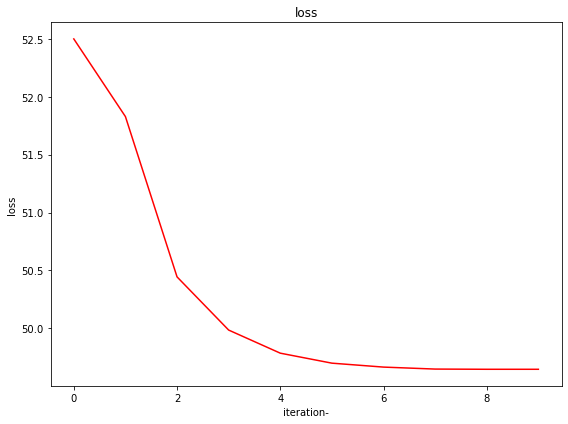

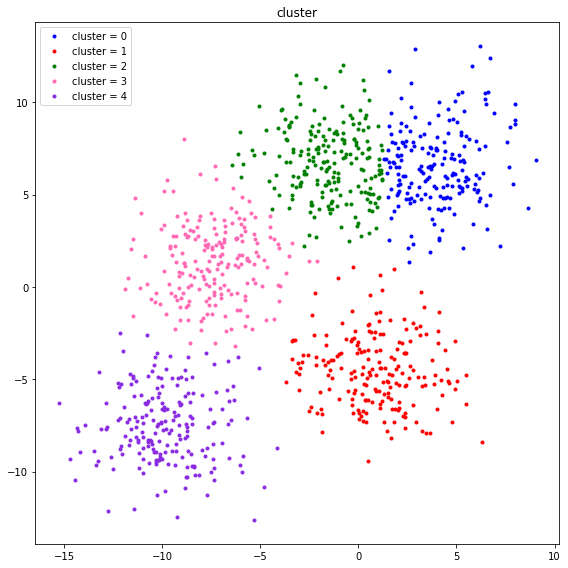

[[52.50069024]
 [51.82943941]
 [50.44386397]
 [49.98415418]
 [49.7844824 ]
 [49.69808096]
 [49.66410476]
 [49.64698884]
 [49.64520146]
 [49.64520146]]


In [242]:
plot_loss_curve(loss_iteration)
plot_cluster(feature, label_feature, 5)
print(loss_iteration)

## plot the results

In [243]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')
    
    
#plot_data(feature)

In [244]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration-')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
#plot_loss_curve(loss_iteration)
#print(loss_iteration)

In [245]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    num_data = centroid_iteration.shape[0]
    num_centroid = centroid_iteration.shape[1]
    
    colors = ['blue','red','green','hotpink','blueviolet','aquamarine','gray','olive','indigo','chocolate','greenyellow','gold','darkmagenta']
    
    for i in range(num_centroid - 1):    
        plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', color = colors[i], label = "class = "+str(i))
        plt.plot(centroid_iteration[0,i,0], centroid_iteration[0,i,1], 'o', color = 'blue')
        plt.plot(centroid_iteration[num_data-1,i,0], centroid_iteration[num_data-1,i,1], 's', color = 'red')
        
    i = num_centroid-1
    plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', color = colors[i], label = "class = "+str(i))
    plt.plot(centroid_iteration[0,i,0], centroid_iteration[0,i,1], 'o', color = 'blue', label = "initial")
    plt.plot(centroid_iteration[num_data-1,i,0], centroid_iteration[num_data-1,i,1], 's', color = 'red', label = "final")

    plt.legend()
    plt.tight_layout()
    plt.show()

#plot_centroid(centroid_iteration)

In [246]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    num_data = feature.shape[0]
    num_cluster = label_cluster
    colors = ['blue','red','green','hotpink','blueviolet','aquamarine','gray','olive','indigo','chocolate','greenyellow','gold','darkmagenta']

    point_x = feature[:,0]
    point_y = feature[:,1]

    for i in range(num_cluster):
        x_filt = point_x[label_feature[:] == i]
        y_filt = point_y[label_feature[:] == i]
        plt.plot(x_filt, y_filt, '.', color = colors[i], label = "cluster = "+str(i))

    plt.legend()
    plt.tight_layout()
    plt.show()

#plot_cluster(feature, label_feature, 5)

***

# results

***

1. plot the input data

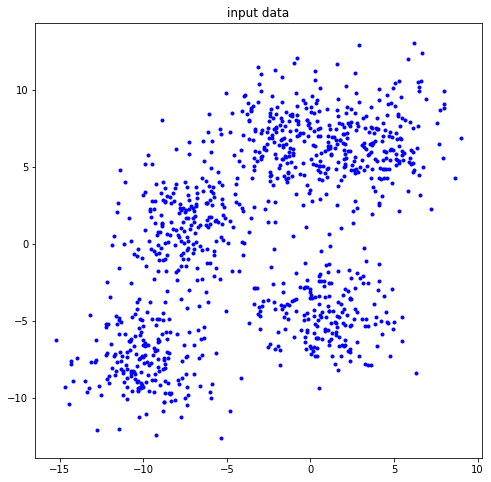

In [247]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

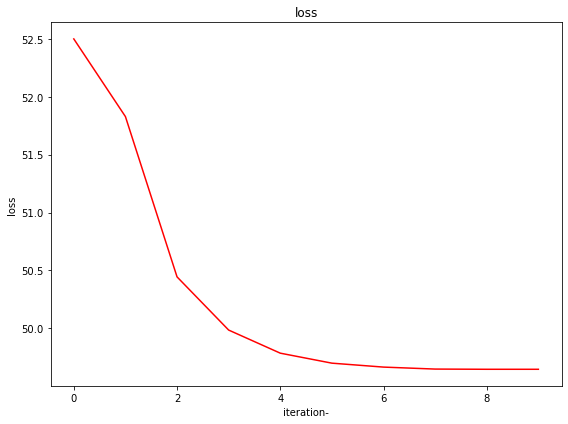

In [248]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

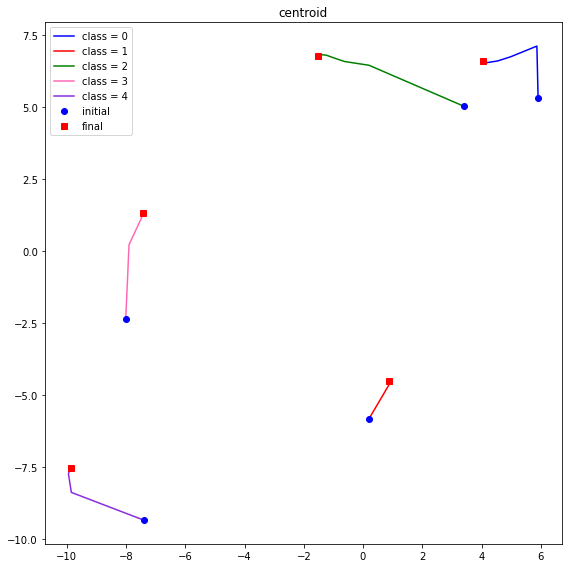

In [249]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

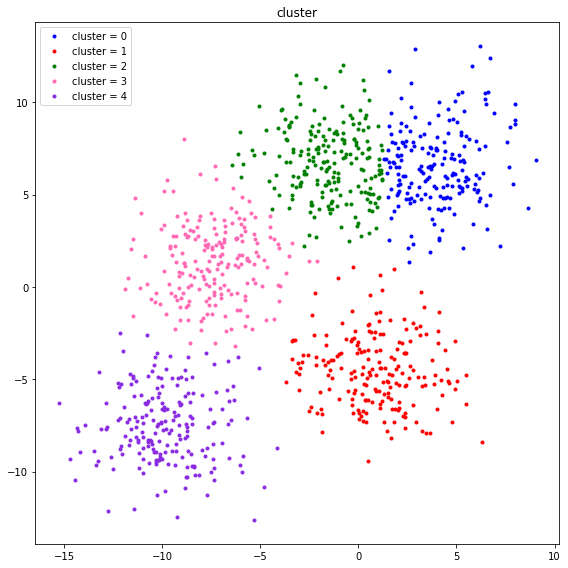

In [250]:
plot_cluster(feature, label_feature, 5)

***

5. plot the loss over the iterations with the number of clusters being 10

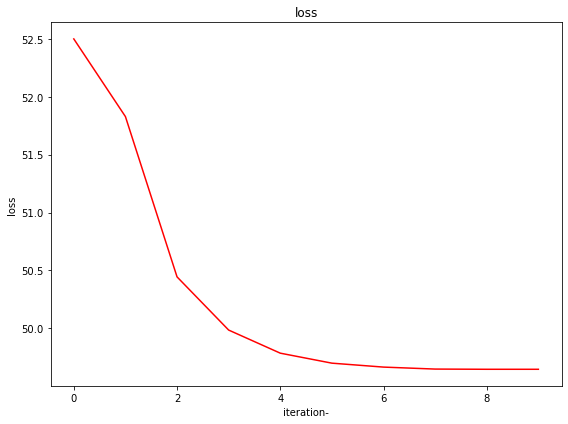

In [251]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

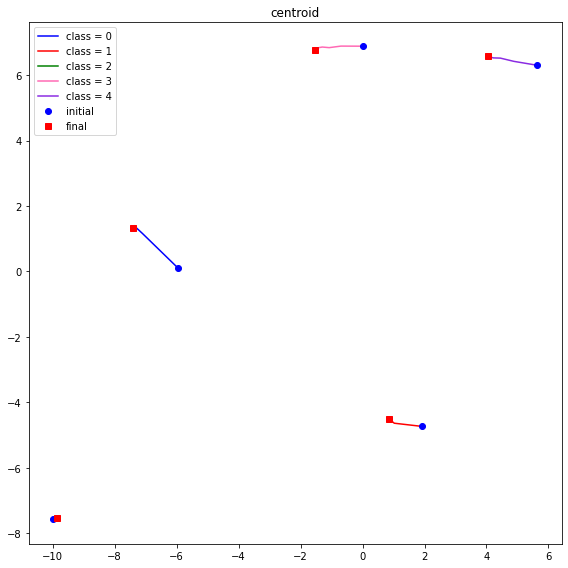

In [127]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

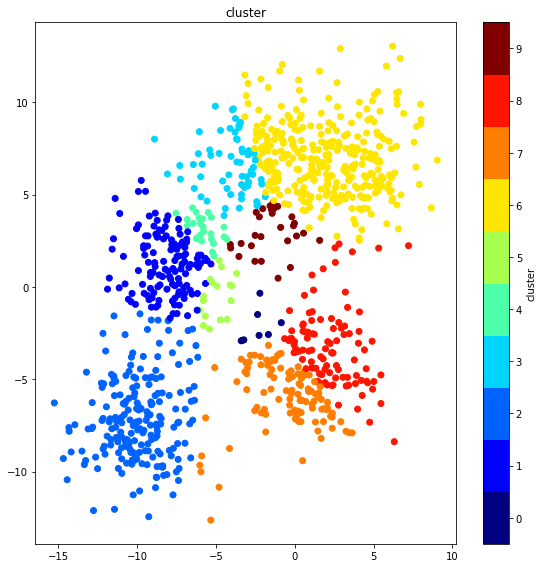

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***